In [1]:
import ultralytics
from ultralytics import YOLO

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 

import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

# For the classification model

In [5]:
import os
img_path = os.path.join('..', 'data', 'female', 'female_113.jpg')
img = cv2.imread(img_path)

img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [6]:
base_dir = os.getcwd()
weights_path = os.path.join(base_dir, '..', 'yolo-results', 'train', 'weights', 'best.pt')

model = YOLO(weights_path)
model = model.cpu()

In [7]:
target_layers =[model.model.model[-2]]

In [8]:
cam = EigenCAM(model, target_layers,task='cls')

0: 224x224 female 1.00, male 0.00, 47.4ms
Speed: 11.0ms preprocess, 47.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


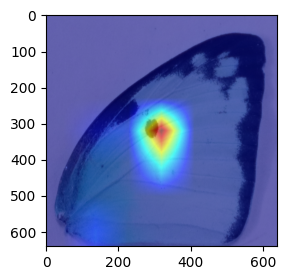

In [9]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 224x224 female 1.00, male 0.00, 15.5ms
Speed: 5.7ms preprocess, 15.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


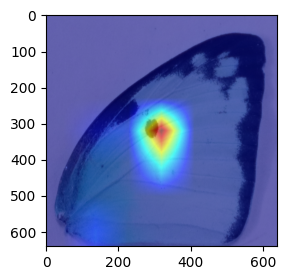

In [10]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [11]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 224x224 female 1.00, male 0.00, 15.3ms
Speed: 5.1ms preprocess, 15.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


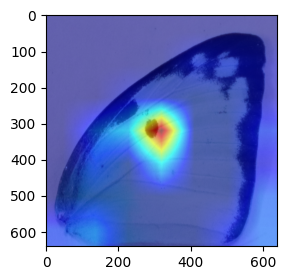

In [12]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

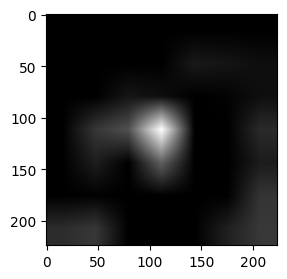

In [13]:
g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224,224))

plt.imshow(g_scale, cmap='gray')
plt.show()

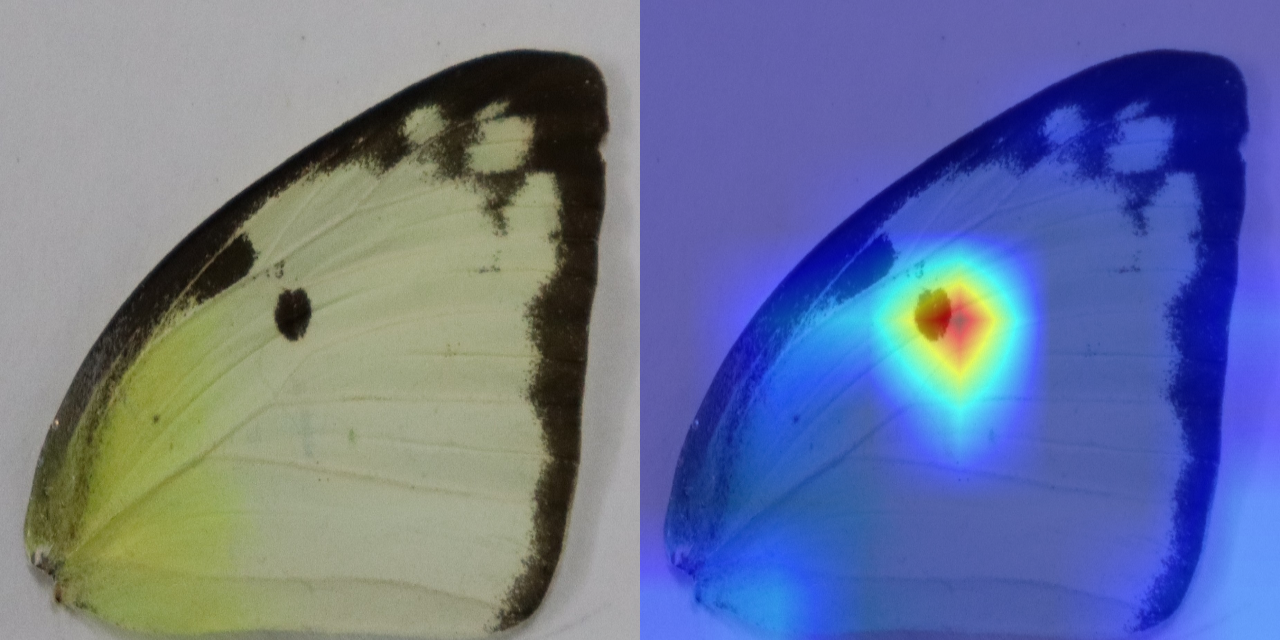

In [14]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))